# Lab 02 - Applied Geophysics 1
## Surveying Techniques
Molly Bilhartz

## Objectives
1) Describe how the GPS receivers calculate our position.

GPS receivers calculate our position using trilateration. GPS receivers use satellites to determine their position. A satellite will send its exact position in orbit and a signal timestamp to the GPS receiver. By measuring the travel time of signals from 4 different satellites (needs 1 satellite per dimension), the receiver computes distances and solves for your/its latitude, longitude, elevation, and time.

2) Describe how a Differential GPS reduces the error compared to a handheld GPS.

A differential GPS uses 1 fixed base station with known and unchanging latitude, longitude and elevation in conjunction with a mobile GPS receiver that is moved manually from site to site collecting latitude, longitude, elevation and time data. The base station compares its known position with the GPS calculated location, corrects for errors and produces more precise coordinates down to 1-3 m. While we learned last week that the handheld GPS devices are accurate to about 5-15 m with less than ideal weather conditions; this is a significant reduction in error.

3) Describe how a Total Station is used to determine position.

Similar to how a DGPS survey uses 1 fixed position transmitter and 1 mobile receiver, the total station is the fixed station in this survey and a corner reflector is the mobile receiver. The corner reflector receives the laser being shot from the total station and reflects it back to the total station where the total station measures the distance by timing the laser’s reflection as well as horizontal and vertical angles to the corner reflector. Using its known position along with the angles and distance (time derived) measurements, the total station calculates precise coordinates down to a few centimeters.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [3]:
handheld_data = [
    'handheld-lab2-grp1.csv',
    'Lab2Handheld.csv',
    'Group02-Handheld-Data.csv',
    'lab02-data.csv']

emlid_dgps_data = [
    'emlid-group 2 and 3.csv',
    'emlid-lab 02.csv',
    'emlid-lab 2.csv',
    'Lab2DataEmlid.csv']

trimble_totstat_data = [
    'trimble-tsc3-gpgn318 lab 2.csv',
    'trimble-tsc3-gpgn318 lab2 g2.csv',
    'trimble-tsc5-lab 2.csv',
    'total-station-Lab 2.csv']
    

In [6]:
h1 = pd.read_csv('../coursework_molly/Lab02/handheld-lab2-grp1.csv')
h1_reindex = h1[["flag", "easting_m", "northing_m"]]
print(h1_reindex)

   flag  easting_m  northing_m
0    A1     481012     4400171
1    A2     481017     4400173
2    A3     481021     4400176
3    A4     481026     4400180
4    A5     481030     4400183
5    B1     481016     4400171
6    B2     481020     4400173
7    B3     481025     4400175
8    B4     481029     4400177
9    B5     481032     4400181
10   C1     481019     4400167
11   C2     481024     4400172
12   C3     481029     4400176
13   C4     481032     4400181
14   C5     481033     4400179
15   D1     481023     4400165
16   D2     481026     4400169
17   D3     481028     4400169
18   D4     481031     4400171
19   D5     481037     4400172


In [7]:
h2 = pd.read_csv("../coursework_molly/Lab02/Lab2Handheld.csv", header=None, usecols=[0,2,3])
h2.columns = ["flag", "easting_m", "northing_m"]
h2["flag"] = [f"E{i+1}" for i in range(len(h2))]
print(h2.head())


  flag  easting_m  northing_m
0   E1     481041     4400167
1   E2     481038     4400163
2   E3     481033     4400160
3   E4     481030     4400156
4   E5     481027     4400154


In [8]:
h3 = pd.read_csv("../coursework_molly/Lab02/Group02-Handheld-Data.csv")
h3.columns = ["Pt", "Latitude", "Longitude"]
h3.rename(columns={"Pt": "flag", 'Latitude':'easting_m', 'Longitude':'northing_m'}, inplace=True)
print(h3.head())


  flag  easting_m  northing_m
0   A1     481018     4400178
1   A2     481022     4400180
2   A3     481027     4400184
3   A4     481031     4400186
4   A5     481032     4400188


In [9]:
h4 = pd.read_csv('../coursework_molly/Lab02/lab02-data.csv')
h4.rename(columns={"Point Name": "flag", 'Easting':'easting_m', 'Northing':'northing_m'}, inplace=True)
h4 = h4[['flag', 'easting_m', 'northing_m']]
print(h4.head())

  flag   easting_m   northing_m
0   A1  481014.371  4400174.931
1   A2  481018.034  4400178.063
2   A3  481022.084  4400180.952
3   A4  481026.202  4400183.751
4   A5  481030.367  4400186.545


In [10]:
e1 = pd.read_csv('../coursework_molly/Lab02/emlid-group 2 and 3.csv')
e1 = e1[['Name', 'Easting', 'Northing']]
e1.rename(columns={'Name': 'flag', 'Easting':'easting_m', 'Northing':'northing_m'}, inplace=True)
print(e1.head())

  flag   easting_m   northing_m
0   5e  481041.313  4400170.042
1  5e1  481041.315  4400170.053
2   4e  481037.226  4400167.237
3  4e1  481037.217  4400167.243
4   3e  481033.107  4400164.367


In [11]:
e2 = pd.read_csv('../coursework_molly/Lab02/emlid-lab 02.csv')
e2 = e2[['Name', 'Easting', 'Northing']]
e2.rename(columns={'Name': 'flag', 'Easting':'easting_m', 'Northing':'northing_m'}, inplace=True)
print(e2.head())
print(e2.shape)

  flag   easting_m   northing_m
0   D1  481022.531  4400162.889
1   D1  481022.585  4400162.899
2   D2  481026.649  4400165.783
3   D3  481030.724  4400168.591
4   D4  481034.757  4400171.490
(7, 3)


In [12]:
e3 = pd.read_csv('../coursework_molly/Lab02/emlid-lab 2.csv')
e3 = e3[['Name', 'Easting', 'Northing']]
e3.rename(columns={'Name': 'flag', 'Easting':'easting_m', 'Northing':'northing_m'}, inplace=True)
print(e3)
print(e3.shape)

    flag   easting_m   northing_m
0   well  481043.533  4400178.933
1     e5  481041.820  4400170.147
2     e5  481041.816  4400170.151
3     e6  481037.716  4400167.403
4     e4  481037.628  4400167.408
5     e3  481033.492  4400164.599
6     e3  481033.563  4400164.520
7     e2  481029.464  4400161.718
8    eq1  481025.441  4400158.828
9     d2  481026.631  4400165.783
10    c3  481027.810  4400172.617
11   nb4  481029.083  4400179.728
12    a1  481029.845  4400184.635
13    d4  481034.799  4400171.488
14    b2  481020.931  4400173.966
15    b3  481020.928  4400173.966
16    a1  481014.019  4400175.243
17    a2  481018.043  4400178.105
18    a3  481022.172  4400180.972
19    a4  481026.250  4400183.828
20    b5  481033.233  4400182.527
21    a5  481030.423  4400186.623
22    c5  481036.074  4400178.360
23    c6  481036.086  4400178.396
24    d5  481038.948  4400174.306
25    e4  481030.719  4400168.648
26    d3  481030.730  4400168.671
27    d1  481022.530  4400162.924
28    c1  4810

In [13]:
e4 = pd.read_csv('../coursework_molly/Lab02/Lab2DataEmlid.csv')
e4 = e4[['Flag Row','Flag Column', 'Easting', 'Northing']]
e4.rename(columns={'Flag Row': 'flag', 'Easting':'easting_m', 'Northing':'northing_m'}, inplace=True)

e4["flag"] = e4["flag"].str.lower() + e4["Flag Column"].astype(str)
e4 = e4.drop(columns=["Flag Column"])

print(e4)
print(e4.shape)

   flag   easting_m   northing_m
0    e5  481041.811  4400170.153
1    e4  481037.640  4400167.391
2    e3  481033.527  4400164.539
3    e2  481029.453  4400161.675
4    e1  481025.363  4400158.791
5    d2  481026.636  4400165.777
6    c3  481027.856  4400172.738
7    b4  481029.077  4400179.688
8    a5  481030.395  4400186.591
9    a5  481030.391  4400186.559
10   d4  481034.800  4400171.520
11   b2  481020.923  4400173.964
12   a1  481014.012  4400175.200
13   a2  481018.067  4400178.081
14   a3  481022.163  4400180.946
15   a4  481026.283  4400183.771
16   b5  481033.271  4400182.497
17   c5  481036.115  4400178.396
18   d5  481038.962  4400174.295
19   d3  481030.728  4400168.654
20   d1  481022.517  4400162.880
21   c1  481019.637  4400167.096
22   b1  481016.866  4400171.130
23   c2  481023.770  4400169.889
24   c4  481031.960  4400175.598
25   b3  481024.994  4400176.859
(26, 3)


In [14]:
t1 = pd.read_csv('../coursework_molly/Lab02/trimble-tsc3-gpgn318 lab 2.csv')
t1.columns = ['flag', 'northing_m', 'easting_m', 'a', 'b']
t1 = t1.drop(columns=['a','b'])
t1.loc[ : ,'flag'] = ['A1','A2','A3','A4','A5']

# Reorder columns
t1 = t1[['flag', 'easting_m', 'northing_m']]

print(t1)
print(t1.shape)

  flag   easting_m   northing_m
0   A1  481022.084  4400180.952
1   A2  481018.034  4400178.063
2   A3  481014.371  4400174.931
3   A4  481026.202  4400183.751
4   A5  481030.367  4400186.545
(5, 3)


In [15]:
t2 = pd.read_csv('../coursework_molly/Lab02/trimble-tsc3-gpgn318 lab2 g2.csv')
t2.columns = ['flag', 'northing_m', 'easting_m', 'a', 'b']
t2 = t2.drop(columns=['a','b'])

t2.loc[ :4, 'flag'] = ['D1','D2','D3','D4','D5']
t2.loc[5: , 'flag'] = ['E1','E2','E3','E4','E5']

t2 = t2[['flag', 'easting_m', 'northing_m']]

print(t2)
print(t2.shape)


  flag   easting_m   northing_m
0   D1  481022.495  4400162.874
1   D2  481026.594  4400165.736
2   D3  481030.689  4400168.581
3   D4  481034.768  4400171.461
4   D5  481038.911  4400174.234
5   E1  481025.271  4400158.739
6   E2  481029.385  4400161.636
7   E3  481033.475  4400164.510
8   E4  481037.580  4400167.344
9   E5  481041.715  4400170.141
(10, 3)


In [16]:
t3 = pd.read_csv('../coursework_molly/Lab02/trimble-tsc5-lab 2.csv')
t3.columns = ['flag', 'northing_m', 'easting_m', 'a', 'b']
t3= t3.drop(columns=['a','b'])
t3 = t3[['flag', 'easting_m', 'northing_m']]

print(t3)
print(t3.shape)


       flag   easting_m   northing_m
0   EL_5773  480944.354  4400167.148
1        b5  481033.196  4400182.449
2        b4  481029.047  4400179.663
3        b3  481024.933  4400176.858
4        b2  481020.866  4400173.940
5        b1  481016.811  4400171.082
6        c5  481036.072  4400178.346
7        c4  481031.928  4400175.563
8        c3  481027.808  4400172.711
9        c2  481023.713  4400169.858
10       c1  481019.568  4400167.059
(11, 3)


In [17]:
t4 = pd.read_csv('../coursework_molly/Lab02/total-station-Lab 2.csv')
t4.columns = ['flag', 'northing_m', 'easting_m', 'a', 'b']
t4= t4.drop(columns=['a','b'])
t4 = t4.drop(index=t4.index[28:])

t4 = t4[['flag', 'easting_m', 'northing_m']]

print(t4)
print(t4.shape)


    flag   easting_m   northing_m
0    Kaf  481043.533  4400178.933
1   base  481012.800  4400187.822
2     A1  481013.965  4400175.192
3     A2  481018.028  4400178.064
4     A3  481022.166  4400180.935
5     A4  481026.304  4400183.788
6     A5  481030.399  4400186.590
7     B1  481016.867  4400171.127
8     B2  481020.921  4400174.000
9     B3  481024.973  4400176.888
10    B4  481029.095  4400179.746
11    B5  481033.280  4400182.542
12    C1  481019.737  4400167.082
13    C2  481023.800  4400169.876
14    C3  481027.833  4400172.698
15    C4  481031.967  4400175.490
16    C5  481036.194  4400178.352
17    D1  481022.428  4400162.869
18    D2  481026.597  4400165.700
19    D3  481030.680  4400168.584
20    D4  481034.789  4400171.443
21    D5  481038.936  4400174.211
22    E1  481025.311  4400158.746
23    E2  481029.428  4400161.601
24    E3  481033.520  4400164.465
25    E4  481037.646  4400167.330
26    E5  481041.773  4400170.098
27    CT  481047.852  4400153.840
(28, 3)


In [18]:
cols = ["flag", "easting_m", "northing_m"]
hand_dfs = [h1[cols], h2[cols], h3[cols], h4[cols]]

handheld_data = pd.concat(hand_dfs, ignore_index=True)

print(handheld_data)
print(handheld_data.shape)

   flag   easting_m   northing_m
0    A1  481012.000  4400171.000
1    A2  481017.000  4400173.000
2    A3  481021.000  4400176.000
3    A4  481026.000  4400180.000
4    A5  481030.000  4400183.000
5    B1  481016.000  4400171.000
6    B2  481020.000  4400173.000
7    B3  481025.000  4400175.000
8    B4  481029.000  4400177.000
9    B5  481032.000  4400181.000
10   C1  481019.000  4400167.000
11   C2  481024.000  4400172.000
12   C3  481029.000  4400176.000
13   C4  481032.000  4400181.000
14   C5  481033.000  4400179.000
15   D1  481023.000  4400165.000
16   D2  481026.000  4400169.000
17   D3  481028.000  4400169.000
18   D4  481031.000  4400171.000
19   D5  481037.000  4400172.000
20   E1  481041.000  4400167.000
21   E2  481038.000  4400163.000
22   E3  481033.000  4400160.000
23   E4  481030.000  4400156.000
24   E5  481027.000  4400154.000
25   A1  481018.000  4400178.000
26   A2  481022.000  4400180.000
27   A3  481027.000  4400184.000
28   A4  481031.000  4400186.000
29   A5  4

In [19]:
cols = ["flag", "easting_m", "northing_m"]
emlid_dfs = [e1[cols], e2[cols], e3[cols], e4[cols]]
emlid_data = pd.concat(emlid_dfs, ignore_index=True)

print(emlid_data)
print(emlid_data.shape)

   flag   easting_m   northing_m
0    5e  481041.313  4400170.042
1   5e1  481041.315  4400170.053
2    4e  481037.226  4400167.237
3   4e1  481037.217  4400167.243
4    3e  481033.107  4400164.367
..  ...         ...          ...
83   c1  481019.637  4400167.096
84   b1  481016.866  4400171.130
85   c2  481023.770  4400169.889
86   c4  481031.960  4400175.598
87   b3  481024.994  4400176.859

[88 rows x 3 columns]
(88, 3)


In [23]:
cols = ["flag", "easting_m", "northing_m"]
trimble_dfs = [t1[cols], t2[cols], t3[cols], t4[cols]]
trimble_data = pd.concat(trimble_dfs, ignore_index=True)

print(trimble_data.head)
print(trimble_data.shape)

<bound method NDFrame.head of        flag   easting_m   northing_m
0        A1  481022.084  4400180.952
1        A2  481018.034  4400178.063
2        A3  481014.371  4400174.931
3        A4  481026.202  4400183.751
4        A5  481030.367  4400186.545
5        D1  481022.495  4400162.874
6        D2  481026.594  4400165.736
7        D3  481030.689  4400168.581
8        D4  481034.768  4400171.461
9        D5  481038.911  4400174.234
10       E1  481025.271  4400158.739
11       E2  481029.385  4400161.636
12       E3  481033.475  4400164.510
13       E4  481037.580  4400167.344
14       E5  481041.715  4400170.141
15  EL_5773  480944.354  4400167.148
16       b5  481033.196  4400182.449
17       b4  481029.047  4400179.663
18       b3  481024.933  4400176.858
19       b2  481020.866  4400173.940
20       b1  481016.811  4400171.082
21       c5  481036.072  4400178.346
22       c4  481031.928  4400175.563
23       c3  481027.808  4400172.711
24       c2  481023.713  4400169.858
25      

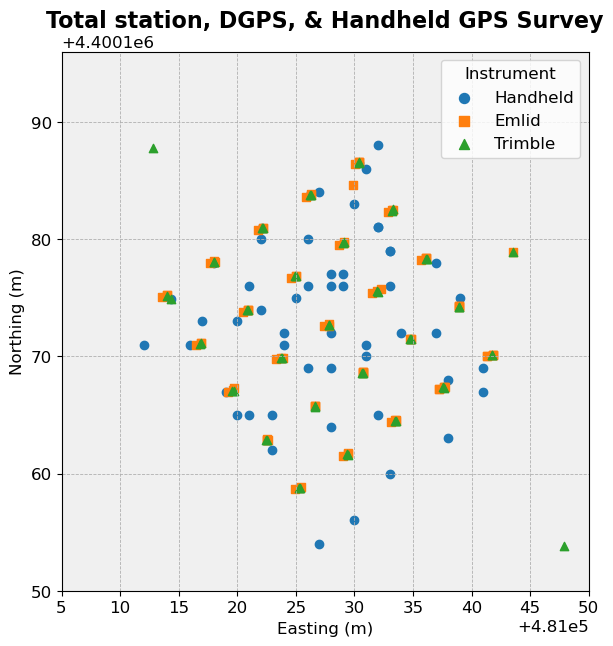

In [22]:
x0, y0 = 481005, 4400150  #481014.371  4400174.931
plt.xlim(x0, x0 + 45)
plt.ylim(y0, y0 + 46)

plt.scatter(handheld_data['easting_m'], handheld_data['northing_m'],
            marker='o', label='Handheld')
plt.scatter(emlid_data['easting_m'], emlid_data['northing_m'],
            marker='s', label='Emlid')
plt.scatter(trimble_data['easting_m'], trimble_data['northing_m'],
            marker='^', label='Trimble')

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 12
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.grid(True, linestyle='--', linewidth=0.6)
plt.title('Total station, DGPS, & Handheld GPS Survey', fontsize= 16, fontweight= 'bold')

ax = plt.gca()
ax.set_facecolor('#f0f0f0')
ax.set_aspect('equal', adjustable='box')
plt.legend(title='Instrument', loc='upper right', scatterpoints=1, markerscale=1.2, frameon=True)
plt.show()
